# 분류

## 데이터 준비

In [ ]:
!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg

--2021-12-24 05:17:09--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 13.226.46.163, 2600:9000:21f2:8e00:0:5a51:64c9:c681, 2600:9000:21f2:6000:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.226.46.163|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2021-12-24 05:17:09--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.226.46.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.96K  --.-KB/s    in 0.02s   

2021-12-24 05:17:09 (2.59 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61397]

--2021-12-24 05:17:09--  http://farm3.static.flickr.com

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

## 예측함수 선언

In [ ]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  # target_size=(224, 224) : 사진크기 지정
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환 [R, G, B] 순
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int))
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 세로
  # 세번째 224 : 가로
  # 네번째 3 : R, G, B 채널 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    

분류 실행

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

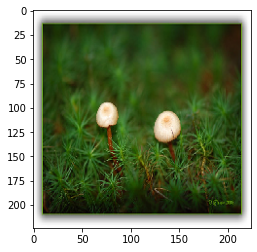

49152/35363 [=========================================] - 0s 0us/step
acorn (33.70%)


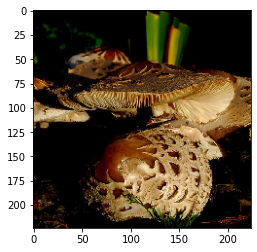

mushroom (71.41%)


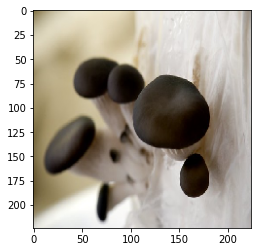

birdhouse (23.68%)


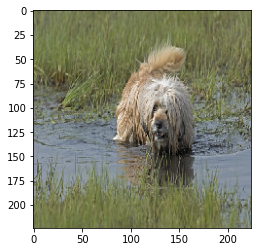

Tibetan_terrier (80.98%)


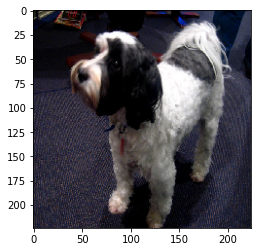

Tibetan_terrier (86.20%)


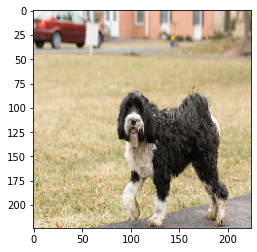

standard_poodle (23.26%)


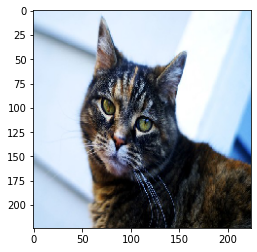

tabby (56.46%)


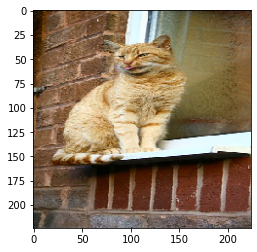

tiger_cat (39.90%)


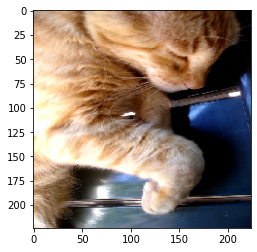

tiger_cat (18.95%)


In [ ]:
from tensorflow.keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  

못 맞춘것들은 신뢰도가 낮은편

신뢰도 낮은것은 기각처리를 하는것도 방법

## 커스텀 데이터 학습 - train_x, train_y에 의한
다음에서 다운받은 데이터의 일부

http://vision.stanford.edu/aditya86/ImageNetDogs

## 커스텀 데이터 다운로드
dogs.tar.gz

In [ ]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs.tar.gz
!ls -al  

--2021-12-24 05:43:28--  https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs.tar.gz [following]
--2021-12-24 05:43:28--  https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         100%[===================>]  59.97M   218MB/s    in 0.3s    

2021-12-24 05:43:28 (218 MB/s) - ‘dogs.tar.gz’ saved [62885106/6

In [ ]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

## 데이터 로딩 함수 정의

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16

In [ ]:
model = keras.Sequential()
model.add(Input((500,500,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPolling2D((2,2)))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation="softmax"))

NameError: ignored

In [ ]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)  

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False  


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5)) # 오버피팅 처리
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
# 모델
model.summary()

# 모델 학습
hist = model.fit(train_x, train_y, epochs=200, batch_size=64, shuffle=True, validation_split=0.1)

## 커스텀 데이터 다운로드
dogs_prepared.tar.gz

In [ ]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2021-12-24 06:10:36--  https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2021-12-24 06:10:37--  https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   216MB/s    in 0.3s    

2021-12-24 06:10:37 (216 MB/

In [ ]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

## 디렉토리로 준비된 데이터로 커스텀 학습

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)


# ADD START
train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,      
      class_mode='sparse'
)


# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

# loss, acc = model.evaluate(test_x, test_y)
loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

# y_ = model.predict(test_x)
y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 30s 997ms/step - loss: 116.3229 - acc: 0.5297 - val_loss: 11.3371 - val_acc: 0.8325
Epoch 2/10
24/24 [==============================] - 19s 808ms/step - loss: 12.3647 - acc: 0.7910 - val_loss: 7.2796 - val_acc: 0.7912
Epoch 3/10
24/24 [==============================] - 20s 828ms/step - loss: 6.5708 - acc: 0.8197 - val_loss: 6.5811 - val_acc: 0.8093
Epoch 4/10
24/24 [==============================] - 20s 812ms/step - loss: 6.2048 - acc: 0.8152 - val_loss: 4.4069 - val_acc: 0.8660
Epoch 5/10
24/24 [==============================] - 19s 793ms/step - loss: 4.5577 - acc: 0.8439 - val_loss: 4.2433 - val_acc: 0.8634
Epoch 6/10
24/24 [==============================] - 19s 800ms/step - loss: 3.4144 - acc: 0.8831 - val_loss: 3.5331 - val_acc: 0.8737
Epoch 7/10
24/24 [==============================] - 20s 825ms/step - loss: 4.3983 - acc: 0.8589 - val_loss: 5.327

검증데이터의 정확도가 오르다가 감소하는 경향이 보임

## VGG16 전이학습 Template

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 21s 839ms/step - loss: 108.9840 - acc: 0.5493 - val_loss: 11.8937 - val_acc: 0.8351
Epoch 2/10
24/24 [==============================] - 19s 805ms/step - loss: 13.0227 - acc: 0.7871 - val_loss: 8.8566 - val_acc: 0.8325
Epoch 3/10
24/24 [==============================] - 20s 839ms/step - loss: 9.0687 - acc: 0.8158 - val_loss: 8.9373 - val_acc: 0.8376
Epoch 4/10
24/24 [==============================] - 19s 801ms/step - loss: 7.3234 - acc: 0.8387 - val_loss: 13.8422 - val_acc: 0.7603
Epoch 5/10
24/24 [==============================] - 20s 817ms/step - loss: 6.5164 - acc: 0.8354 - val_loss: 7.4263 - val_acc: 0.8299
Epoch 6/10
24/24 [==============================] - 19s 807ms/step - loss: 3.5729 - acc: 0.9001 - val_loss: 6.9826 - val_acc: 0.8582
Epoch 7/10
24/24 [==============================] - 19s 809ms/step - loss: 4.2846 - acc: 0.8824 - val_loss: 8.07

### 예측 확인 

학습된 모델로 테스트 데이터 그려보기

Found 388 images belonging to 10 classes.


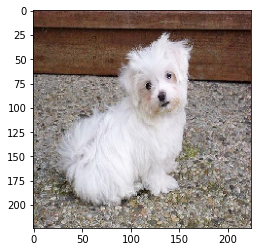

test_y = 2 , predicted = 2


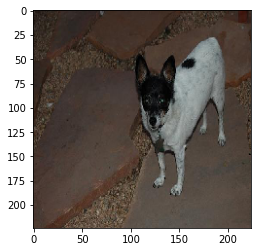

test_y = 7 , predicted = 7


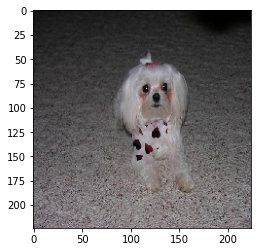

test_y = 2 , predicted = 2


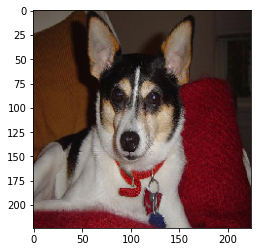

test_y = 7 , predicted = 7


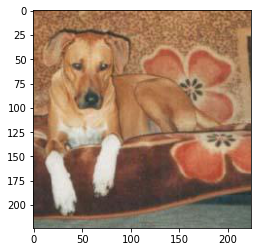

test_y = 8 , predicted = 8


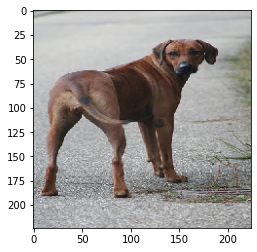

test_y = 8 , predicted = 8


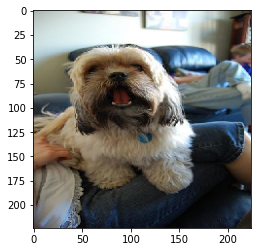

test_y = 4 , predicted = 4


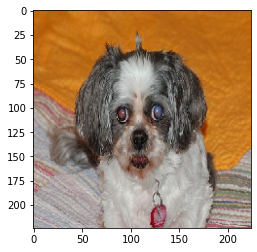

test_y = 4 , predicted = 4


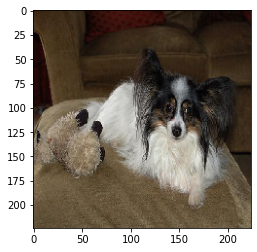

test_y = 6 , predicted = 6


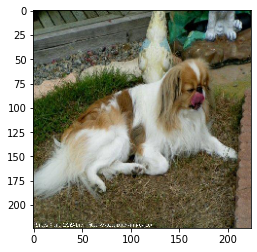

test_y = 1 , predicted = 1


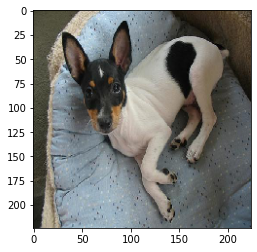

test_y = 7 , predicted = 7


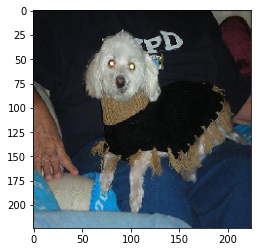

test_y = 2 , predicted = 2


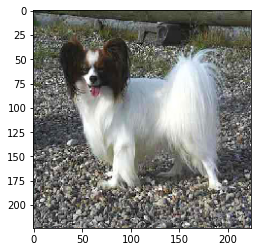

test_y = 6 , predicted = 1


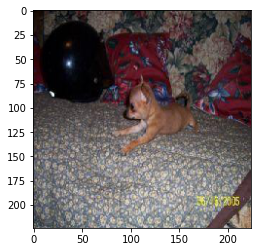

test_y = 0 , predicted = 0


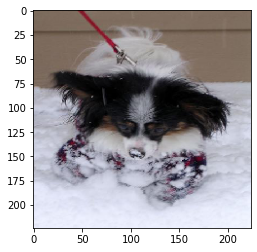

test_y = 6 , predicted = 6


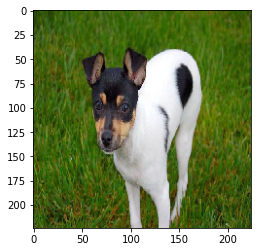

test_y = 7 , predicted = 7


In [ ]:
test_data_generator = ImageDataGenerator(
      # 원 이미지를 그려주기 위해 전처리 함수를 사용 하지 않은 이미지를 읽는다.
      # 모델 호출 시에 직접 전처리 함수를 호출한다.
      # preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=16,
      class_mode='sparse'
)


while True:
  # 한번에 batch_size 16개 만큼 꺼낸다.
  # test_x와 test_y에는 16개가 담겼다.
  test_x, test_y = next(test_data_generator)

  # 모델 호출하기 위해 전처리 함수를 호출하고
  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  # 모델로 예측 하고
  y_ = model.predict(preprocessed_test_x)

  # category index를 구한다.
  predicted = np.argmax(y_, axis=1)

  # 16개 이미지에 대하여 각각 그려보고 정답과 예측 값을 출력한다.
  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print("test_y =", test_y.astype(int)[i], ", predicted =", predicted[i])
  break

## Resnet으로 전이학습

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

94781440/94765736 [==============================] - 0s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 23s 830ms/step - loss: 79.8337 - acc: 0.5696 - val_loss: 4.5226 - val_acc: 0.8634
Epoch 2/10
24/24 [==============================] - 19s 807ms/step - loss: 5.1293 - acc: 0.8289 - val_loss: 2.9720 - val_acc: 0.8711
Epoch 3/10
24/24 [==============================] - 19s 801ms/step - loss: 2.7239 - acc: 0.8681 - val_loss: 2.7616 - val_acc: 0.8763
Epoch 4/10
24/24 [==============================] - 19s 800ms/step - loss: 2.7385 - acc: 0.8720 - val_loss: 3.4741 - val_acc: 0.8711
Epoch 5/10
24/24 [==============================] - 19s 798ms/step - loss: 2.2392 - acc: 0.8929 - val_loss: 2.3894 - val_acc: 0.8969
Epoch 6/10
24/24 [==============================] - 19s 798ms/step - loss: 1.9019 - acc: 0.9027 - val_loss: 2.7243 - val_acc: 0.9149
Epoch 7/10
24/24 [==============================] -